### This script uses the Facebook's open source software 'Prophet' to forecast the spread of COVID-19 worlwide for a defined future timeframe. We are using Prophet here beacuse the model to missing data, shifts in the trend and handles outliers well 

![alt text](https://cdn.weka-fachmedien.de/thumbs/media_uploads/images/1584632058-339-worrlgjo3.jpg.950x534.jpg)

In [19]:
#import the necessary packages
import pandas as pd
from fbprophet import Prophet

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [20]:
#loading the required datasets
df = pd.read_csv('../data/covid_19_data.csv')
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
#df['Date'] = pd.to_datetime(df['Date'])
df.drop('SNo', axis=1, inplace = True)

df_confirmed = pd.read_csv("../data/time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("../data/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("../data/time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [21]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [22]:
confirmed['Confirmed'] = confirmed['Confirmed'].astype(int)
deaths['Deaths'] = deaths['Deaths'].astype(int)
recovered['Recovered'] = recovered['Recovered'] .astype(int)

confirmed.columns = ['ds','y']
deaths.columns = ['ds','y']
recovered.columns = ['ds','y']

confirmed.name = "Confirmed Cases"
deaths.name = "Death Cases"
recovered.name = "Recovery Cases"

## Forecasting global confirmed cases using Prophet (Base model)

Forecasting the comfirmed cases globally for a week's timeframe in advance, with 98% confidence interval. We are use the basic model here with no tweaking of seasonality-related parameters and additional regressors.

In [23]:
def covid_19_prediction(training_data, number_of_days_in_advance):
    
    model = Prophet(interval_width=0.98)
    model.fit(training_data)
    future_cases = model.make_future_dataframe(periods=number_of_days_in_advance)
    
    ### Forecasting the future confirmed cases globally for the next 1 week
    forecast = model.predict(future_cases)
    forecast_coming_week = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    forecast_coming_week = forecast_coming_week[1:]
    forecast_coming_week.ds = forecast_coming_week.ds.dt.day_name()
    forecast_coming_week.rename(columns = {'ds':'day_of_the_week','yhat':'prediction', 
                                     'yhat_lower':'prediction_lower_bound',
                                    'yhat_upper':'prediction_upper_bound'}, inplace=True)
    forecast_coming_week.set_index('day_of_the_week', inplace=True)
    forecast_coming_week['prediction' ] = round(forecast_coming_week.prediction).astype(int)
    forecast_coming_week['prediction_lower_bound'] = round(forecast_coming_week.prediction_lower_bound).astype(int)
    forecast_coming_week['prediction_upper_bound'] = round(forecast_coming_week.prediction_upper_bound).astype(int)
    
    ax = forecast_coming_week.plot(kind="bar",width=0.6, edgecolor='y',  figsize=(12,8), style='.-')
    ax.set_title("Predictions of %s in coming days including an upper an lower bound" %(training_data.name), fontsize=15)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_xlabel("Day of the week", fontsize=12)

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * .8), family="monospace",
                    va='center', ha='center', horizontalalignment='right', verticalalignment='top', 
                    rotation=90, size=12)
        
    #saving the visualization
    fig= ax.get_figure()
    fig.tight_layout()
    fig.savefig("../visualizations/predictions/COVID-19_prediction_of_%s.png" %(training_data.name))   
    
    #Plotting the forecast with the confidence interval of 98 percent
    confirmed_forecast_plot = model.plot(forecast).savefig("../visualizations/predictions/COVID-19_prediction_fit_of_%s.png" %(training_data.name))
    
    model.plot_components(forecast).savefig("../visualizations/predictions/COVID-19_prediction_trend_of_%s.png" %(training_data.name))
    
    return model, forecast, forecast_coming_week     

In [24]:
#copy the predictions folder
!cp -r ~/Exploratory-Data-Analysis-COVID-19/Exploratory-Data-Analysis-COVID-19/visualizations/predictions ~/desktop/

cp: /Users/U708980/Exploratory-Data-Analysis-COVID-19/Exploratory-Data-Analysis-COVID-19/visualizations/predictions: No such file or directory


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


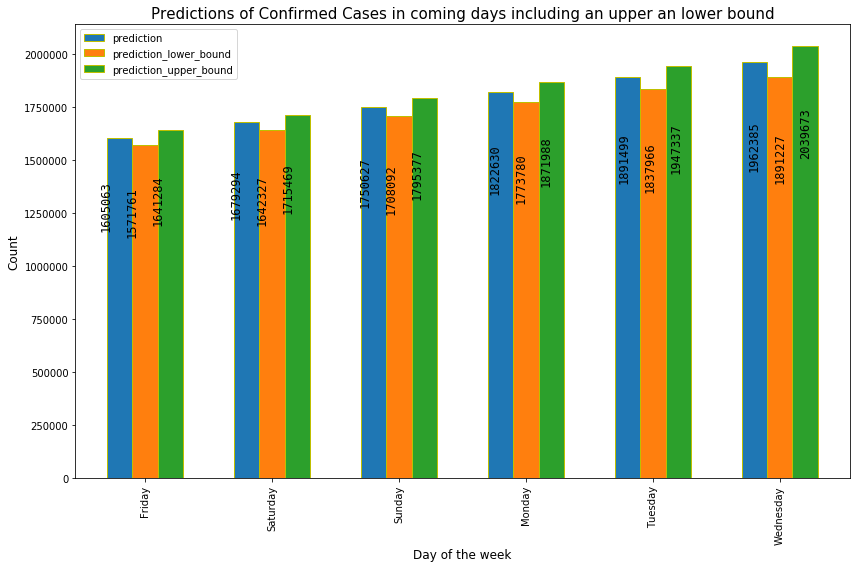

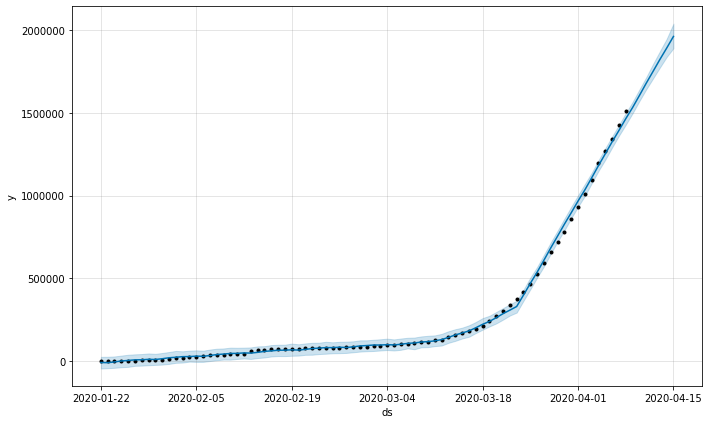

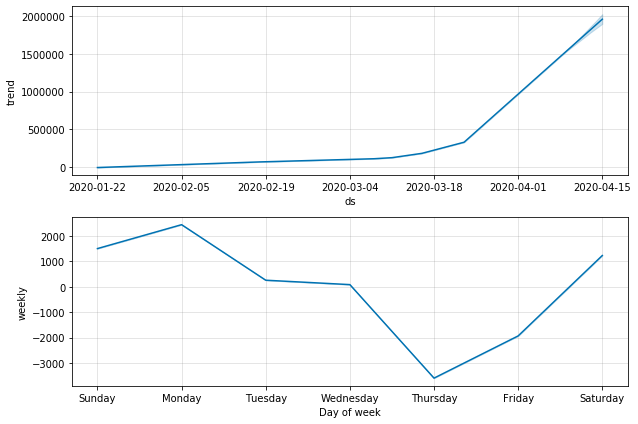

In [25]:
trained_model, forecast, forecast_coming_week = covid_19_prediction(confirmed, 7)

In [26]:
forecast_coming_week.style.background_gradient(cmap='Reds')

,prediction,prediction_lower_bound,prediction_upper_bound
day_of_the_week,,,
Friday,1605063,1571761,1641284
Saturday,1679294,1642327,1715469
Sunday,1750627,1708092,1795377
Monday,1822630,1773780,1871988
Tuesday,1891499,1837966,1947337
Wednesday,1962385,1891227,2039673


## Forecasting global death cases using Prophet (Base model)

Forecasting the death cases globally for a week's timeframe in advance, with 98% confidence interval. We are use the basic model here with no tweaking of seasonality-related parameters and additional regressors.

In [27]:
model = Prophet(interval_width=0.98)
model.fit(deaths)
future_death_cases = model.make_future_dataframe(periods=7)
#future_death_cases.tail(7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecasting the future confirmed cases globally for the next 1 week

In [28]:
forecast = model.predict(future_death_cases)
forecast_coming_week = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [29]:
forecast_coming_week.style.background_gradient(cmap='Reds')

,ds,yhat,yhat_lower,yhat_upper
78,2020-04-09 00:00:00,85063.630800,81115.866173,89086.370539
79,2020-04-10 00:00:00,89483.133239,85735.556408,93085.353040
80,2020-04-11 00:00:00,93907.240695,89952.600280,97756.889890
81,2020-04-12 00:00:00,98232.740745,94402.044711,102422.820405
82,2020-04-13 00:00:00,102646.708936,98363.540959,106992.386759
83,2020-04-14 00:00:00,107037.625835,102034.335210,111738.556780
84,2020-04-15 00:00:00,111434.901916,105598.275282,116951.104188


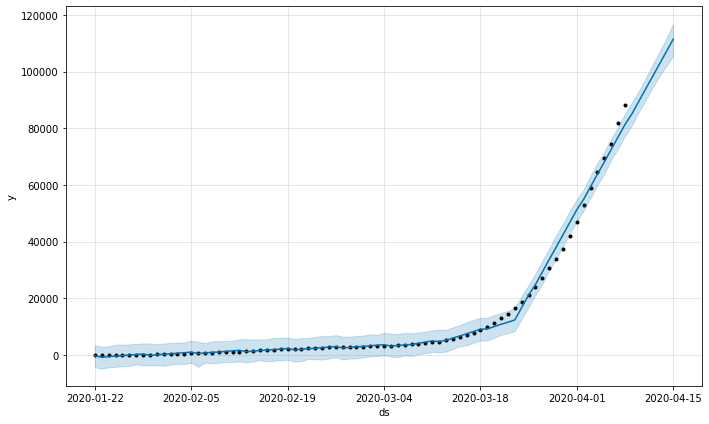

In [30]:
#Plotting the forecast with the confidence interval of 98 percent
death_forecast_plot = model.plot(forecast)

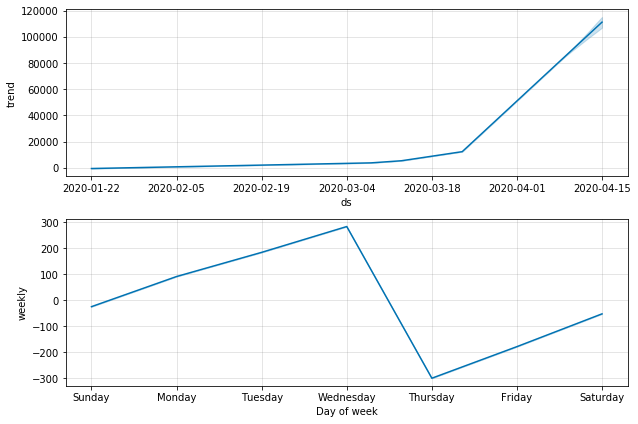

In [31]:
#plotting the forcast for upcoming 7 days
death_forecast_plot = model.plot_components(forecast)

## Forecasting global recovery cases using Prophet (Base model)

Forecasting the recovery cases globally for a week's timeframe in advance, with 98% confidence interval. We are use the basic model here with no tweaking of seasonality-related parameters and additional regressors.

In [32]:
model = Prophet(interval_width=0.98)
model.fit(recovered)
future_recovered_cases = model.make_future_dataframe(periods=7)
#future_death_cases.tail(7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecasting the future confirmed cases globally for the next 1 week

In [33]:
forecast = model.predict(future_recovered_cases)
forecast_coming_week = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [34]:
#printing the predicted values for coming week
forecast_coming_week.style.background_gradient(cmap='Reds')

,ds,yhat,yhat_lower,yhat_upper
78,2020-04-09 00:00:00,306297.865680,291664.555824,321946.410138
79,2020-04-10 00:00:00,318776.459142,304022.672392,332541.937938
80,2020-04-11 00:00:00,332147.325258,316166.627935,345767.577470
81,2020-04-12 00:00:00,344927.938682,327990.711560,360966.915020
82,2020-04-13 00:00:00,358280.197222,341670.656339,376361.754459
83,2020-04-14 00:00:00,371560.289184,354291.660856,390553.426032
84,2020-04-15 00:00:00,385409.489836,366306.957210,404772.637264


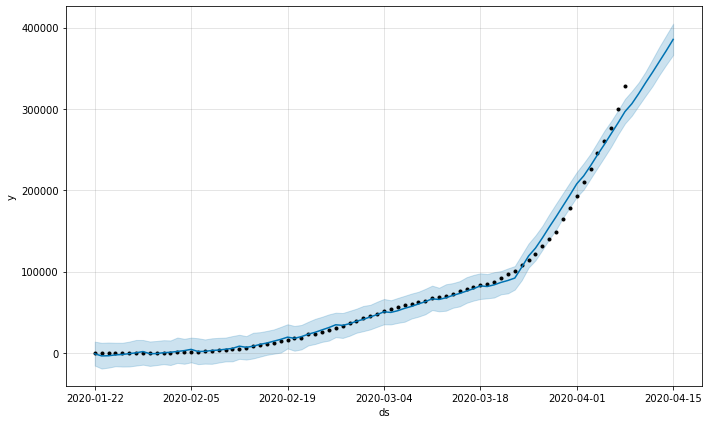

In [35]:
#Plotting the forecast with the confidence interval of 98 percent
recovery_forecast_plot = model.plot(forecast)

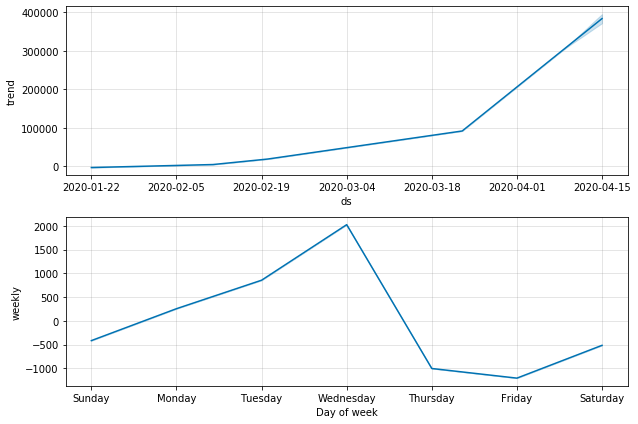

In [36]:
#plotting the forcast for upcoming 7 days
recovery_forecast_plot = model.plot_components(forecast)